In [1]:
from sklearn.ensemble import ExtraTreesClassifier
from models.monthly_average import MonthlyAverageClassifier
from data_helper import DataHelper
from days_statistics import DaysStatistics
import matplotlib.pyplot as plt
import importlib
%matplotlib inline

In [2]:
dh = DataHelper()
days_test = dh.get_testing_days()

In [3]:
# columns = ['pool','day_of_week','month','hour','minute'] # MSE = 1354
# columns = ['pool','day_of_week'] # MSE = 16110
# columns = ['pool','day_of_week','hour','minute'] # MSE = 1915
# columns = ['pool','day_of_week','month','hour','minute','temperature_binned','precipitation_binned'] # MSE = 1389
# columns = ['pool','day_of_week','hour','minute','lines_reserved'] # MSE = 1634
# columns = ['pool','day_of_week','month','hour','minute','holiday'] # MSE = 1362
columns = ['pool','day_of_week','month','hour','minute'] 

# temperature_binned
# wind_binned
# humidity_binned
# precipitation_binned
# pressure_binned
time_step_back = 3
x_train, y_train, x_test, y_test = dh.generate_feature_vectors(columns, time_step_back)

1354.7030609755097


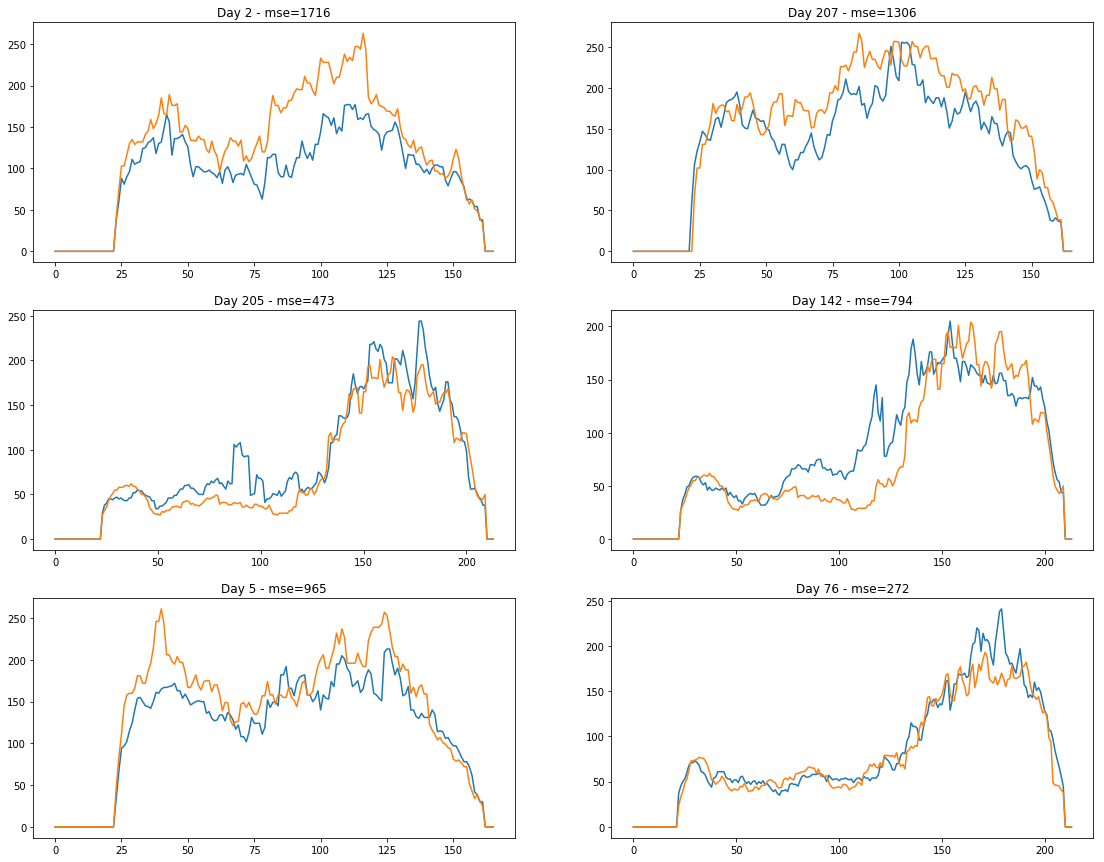

In [200]:
clf = ExtraTreesClassifier(random_state=17, n_estimators=20, max_depth=50, min_samples_split=5, min_samples_leaf=1)
clf.fit(x_train, y_train)
print(dh.mse_on_testing_days(clf, columns, time_step_back))
dh.show_n_days_prediction(clf, columns, 6, time_step_back)

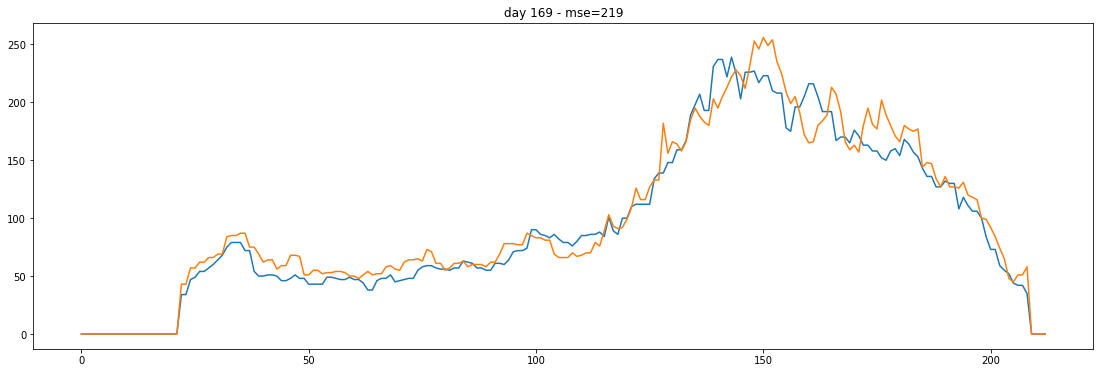

In [101]:
dh.show_prediction(169, clf, columns)

In [207]:
x, y, x_t, y_t = dh.generate_feature_vectors(None, time_step_back)
print(x_t[100:102])

[[73.  2.  0.  3. 25. 12. 20.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  3.  2.  0.
   2.  0. 69.  2.  0.  3. 25. 12. 25.  0.  0.  0.  0.  2.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  3.
   2.  0.  2.  0. 69.  2.  0.  3. 25. 12. 30.  0.  0.  0.  0.  2.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   3.  3.  2.  0.  2.  0.]
 [69.  2.  0.  3. 25. 12. 25.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  3.  2.  0.
   2.  0. 69.  2.  0.  3. 25. 12. 30.  0.  0.  0.  0.  2.  0.  0.  0.  0.
   0.  0.  

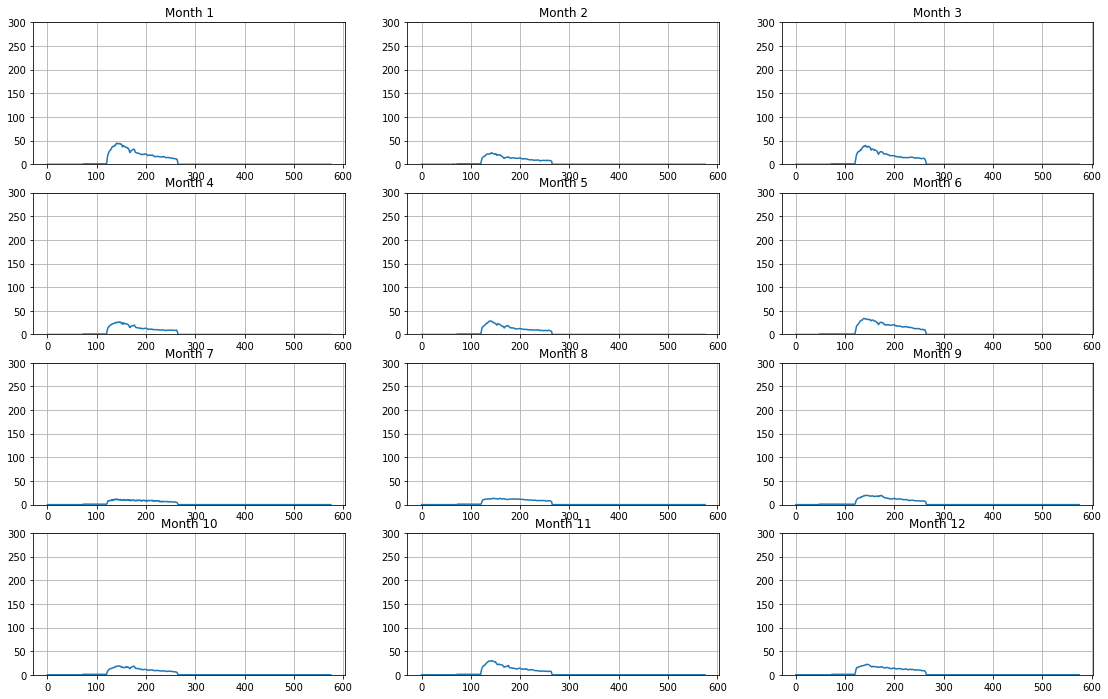

In [4]:
import models
import days_statistics
importlib.reload(models.monthly_average)
importlib.reload(days_statistics)
from models.monthly_average import MonthlyAverageClassifier
from days_statistics import DaysStatistics

mac = MonthlyAverageClassifier()
mac.fit(dh.get_training_days(), columns)

In [279]:
print(dh.mse_on_testing_days(mac, columns, time_step_back))

1872.112390528239


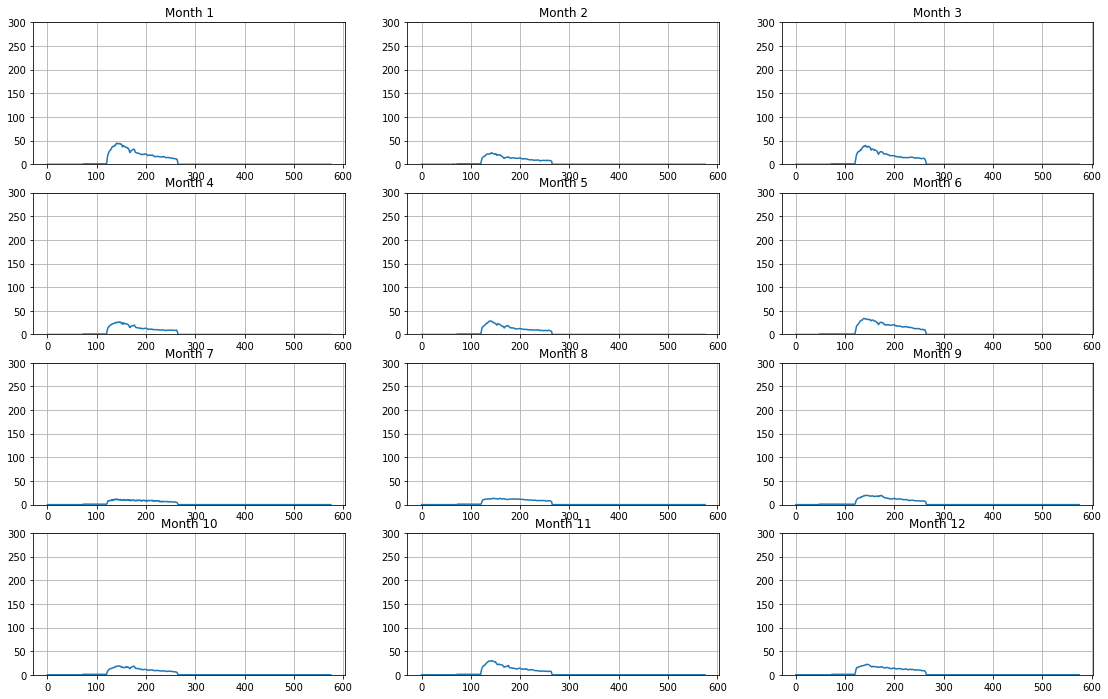

In [5]:
ds = DaysStatistics()
ds.days = dh.get_training_days()
ds.generate_averages(pickle_path='data/days_statistics2.pickle', override_pickle=True)
ds.plot_year_averages_by_month(True)

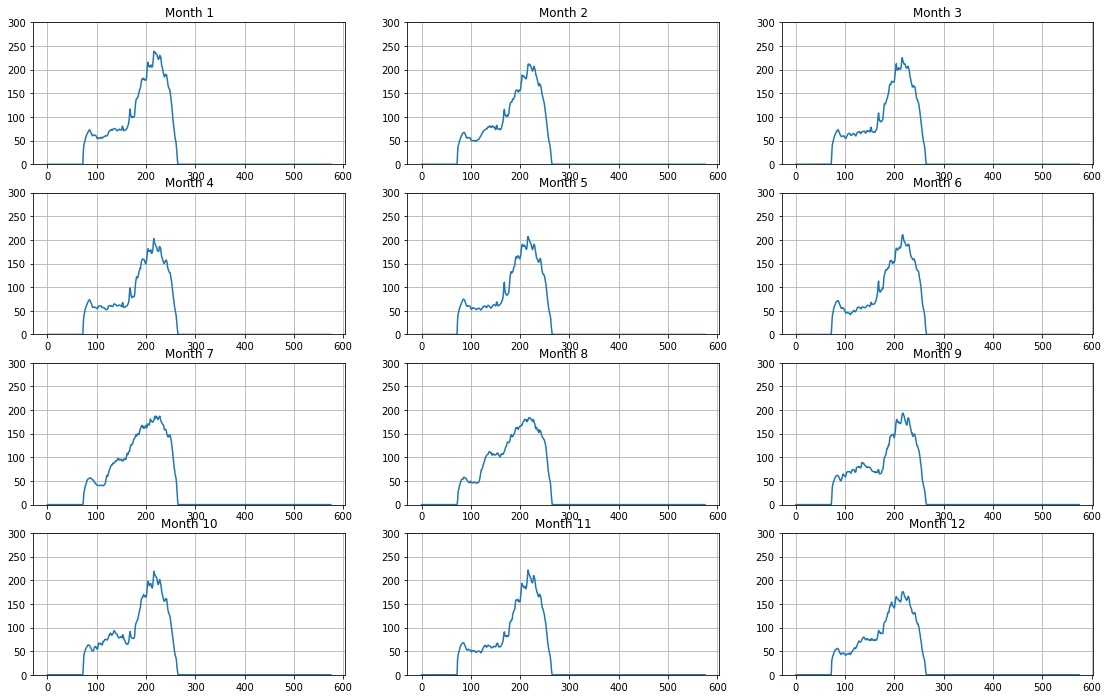

In [6]:
ds = DaysStatistics()
ds.days = dh.get_all_days_list()
ds.generate_averages(pickle_path='data/days_statistics2.pickle', override_pickle=False)
ds.plot_year_averages_by_month(False)